In [1]:
import numpy as np
from collections import Counter
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import datetime
from sklearn.decomposition import PCA 
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.datasets as ds


(128, 128)


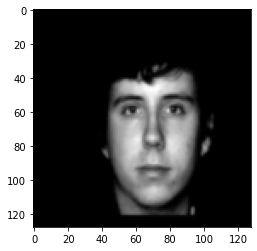

In [2]:
# 查看单个图片信息
f = open(r'D:/桌面/KNN/face/rawdata/2009','rb')  
x = np.fromfile(f,dtype=np.ubyte)
x = x.reshape(128,-1)
print(x.shape)
plt.imshow(x,cmap=plt.cm.gray)
plt.show()
f.close()

In [3]:
# 源数据处理
folder = "D:/桌面/KNN/face/rawdata"
# 或者 folder = "D:\\aatest"

all_file = os.listdir(folder)
# 读取所有data_x数据,  有问题的数据：第1186个，2412号；第1190个，2416号 ；2021号
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))

# 将两个数据标签整理再一起
f = open('D:/桌面/KNN/face/faceDR','r')
r1 = f.readlines()
f.close()

f = open('D:/桌面/KNN/face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

# 整理出data_x,和data_y

man = 0
woman = 0
all_file = os.listdir('D:/桌面/KNN/face/rawdata')
for i in range(len(all_file)):
    with open('D:/桌面/KNN/face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        x = x.reshape(128,-1)
        data_x[i] = x
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                    woman = woman+1
                elif 'male' in j:
                    data_y[i] = 1
                    man = man+1
                else:
                    data_y[i] = None
                break
face_data=data_x.reshape(data_x.shape[0],-1)
face_target = data_y
#print(face_data.shape)
print("number of man is %s,number of woman is %s"%(man,woman))
X = face_data
y = face_target

number of man is 2417,number of woman is 1566


In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=500)
k_range = range(1, 31)
k_score = []

for k in k_range:
    KNN =KNeighborsClassifier(algorithm='auto', #在KNN中使用的算法，其他选项还有ball_tree，kd_tree，和brute
                          leaf_size=30,   #当使用和树有关的算法时的叶子数量
                          metric='minkowski',p=2, #使用的是明可夫斯基距离中的欧式距离，1代表曼哈顿距离，2代表欧氏距离
                          metric_params=None,
                          n_jobs=1,  #并行计算的线程数量
                          n_neighbors=k, #K值的选取
                          weights='distance' #距离计算中使用的权重，distance表示按照距离的倒数加权，uniform表示各样本权重相同
                          )
    #将KNN算法应用在训练集上
    KNN.fit(Xtrain,Ytrain)
    #将结果应用于测试集中
    predict = KNN.predict(Xtest)
    score = KNN.score(Xtest,Ytest)
    k_score.append(score)
# print(predict)
#计算模型的正确率
#print(KNN.score(Xtest,Ytest))


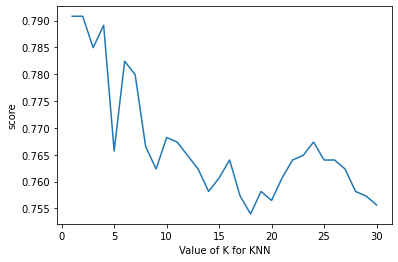

In [22]:
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('score')
plt.show()

In [4]:
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,3983.0,0.010043,0.207590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,6.0
3,3983.0,0.307557,3.489103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,84.0
4,3983.0,0.795631,7.802234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.18,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16380,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16381,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
16382,3983.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=500)
print("Ytrain:")
valuec = pd.Series(Ytrain).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())
print("Ytest:")
valuec = pd.Series(Ytest).value_counts()
print(valuec)
print(valuec[0]/valuec.sum())

Ytrain:
1.0    1692
0.0    1096
dtype: int64
0.3931133428981349
Ytest:
1.0    725
0.0    470
dtype: int64
0.39330543933054396


In [6]:
#pca = PCA(n_components=76, svd_solver='randomized',whiten=True).fit(X)
pca = PCA(n_components=0.95).fit(X)
x_dr = pca.transform(X)
print(x_dr.shape)
X_1 = x_dr

(3983, 178)


In [7]:
pca = PCA(svd_solver='randomized',n_components=76, whiten=True).fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)  
Xtest_pca = pca.transform(Xtest)  

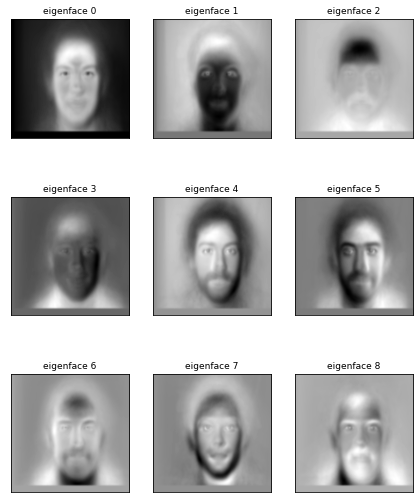

In [8]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.9 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=9)
        plt.xticks(())
        plt.yticks(())

# plot the gallery of the most significative eigenfaces
eigenfaces = pca.components_.reshape((76, 128, 128))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 128, 128)

plt.show()

In [9]:
data = pd.DataFrame(X_1)
data.describe([0.01,0.1,0.3,0.6,0.9,0.99]).T

,count,mean,std,min,1%,10%,30%,50%,60%,90%,99%,max
0,3983.0,-6.589156e-14,2688.746361,-6714.727125,-5507.926714,-3332.978450,-1460.022822,6.394695,706.649925,3209.777668,6980.504710,16771.751202
1,3983.0,-3.700245e-13,1467.360731,-3626.052216,-2448.129003,-1462.504711,-709.368472,-192.432578,123.044468,1329.762081,4392.236972,17177.238662
2,3983.0,8.951090e-14,1364.845763,-4933.961910,-2739.453395,-1575.364247,-780.783277,-101.066619,178.750275,1762.715601,3578.235153,9285.613532
3,3983.0,-1.653212e-13,988.764143,-4317.029395,-2287.745234,-1105.646696,-486.463888,-77.236533,126.124647,1237.340754,2876.651096,4730.791887
4,3983.0,-1.594912e-13,943.902610,-4989.959887,-2092.063416,-1041.154667,-423.044975,-41.808227,124.123728,1075.580907,3198.698437,5244.974527
...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,1.765408e-14,77.824523,-363.913666,-198.114962,-91.961485,-37.029120,-2.117024,16.831930,94.353383,201.485486,499.985130
174,3983.0,-1.620351e-14,77.489079,-338.750453,-194.923714,-93.057455,-35.845503,-1.041492,16.021562,93.849466,200.267043,386.544268
175,3983.0,4.027241e-15,76.933503,-289.168233,-196.379307,-94.135460,-34.044384,0.956367,15.752523,87.818021,198.401217,684.320739
176,3983.0,3.586430e-14,76.544570,-351.067714,-192.361949,-88.688734,-34.111166,-1.443319,15.325849,89.647900,200.416974,673.699818


In [10]:
X_2 = StandardScaler().fit_transform(X_1)
data = pd.DataFrame(X_2)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,3983.0,-5.562265e-17,1.000126,-2.497659,-2.048768,-1.701707,-1.239759,-0.675909,0.002379,0.645476,1.193932,2.596519,6.238542
1,3983.0,3.034856e-16,1.000126,-2.471449,-1.668599,-1.223393,-0.996816,-0.577625,-0.131158,0.475502,0.906341,2.993666,11.707684
2,3983.0,1.498508e-16,1.000126,-3.615486,-2.007404,-1.433535,-1.154388,-0.696121,-0.074059,0.619293,1.291675,2.622043,6.804270
3,3983.0,1.917455e-16,1.000126,-4.366634,-2.314033,-1.429826,-1.118351,-0.604710,-0.078124,0.526015,1.251558,2.909705,4.785151
4,3983.0,2.444832e-16,1.000126,-5.287184,-2.216676,-1.410238,-1.103170,-0.570927,-0.044299,0.442323,1.139647,3.389227,5.557388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3983.0,4.793290e-17,1.000126,-4.676667,-2.545982,-1.567964,-1.181800,-0.606436,-0.027206,0.600521,1.212538,2.589297,6.425326
174,3983.0,-5.270981e-17,1.000126,-4.372138,-2.515815,-1.642933,-1.201061,-0.600082,-0.013442,0.584622,1.211284,2.584780,4.988997
175,3983.0,-6.981053e-17,1.000126,-3.759150,-2.552906,-1.619534,-1.223749,-0.573894,0.012433,0.594034,1.141623,2.579190,8.896081
176,3983.0,-5.736477e-17,1.000126,-4.587024,-2.513387,-1.586332,-1.158800,-0.573152,-0.018858,0.568122,1.171333,2.618633,8.802511


In [11]:
k_range = range(1, 31)
k_score = []

for k in k_range:
    KNN =KNeighborsClassifier(algorithm='auto', #在KNN中使用的算法，其他选项还有ball_tree，kd_tree，和brute
                          leaf_size=30,   #当使用和树有关的算法时的叶子数量
                          metric='minkowski',p=2, #使用的是明可夫斯基距离中的欧式距离，1代表曼哈顿距离，2代表欧氏距离
                          metric_params=None,
                          n_jobs=1,  #并行计算的线程数量
                          n_neighbors=k, #K值的选取
                          weights='distance' #距离计算中使用的权重，distance表示按照距离的倒数加权，uniform表示各样本权重相同
                          )
    #将KNN算法应用在训练集上
    KNN.fit(Xtrain,Ytrain)
    #将结果应用于测试集中
    predict = KNN.predict(Xtest)
    score = KNN.score(Xtest,Ytest)
    k_score.append(score)
# print(predict)
#计算模型的正确率
#print(KNN.score(Xtest,Ytest))


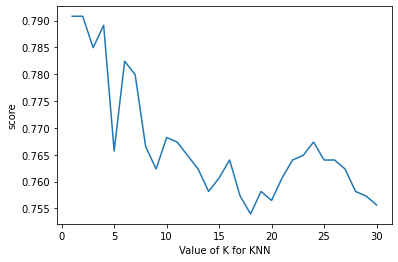

In [12]:
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('score')
plt.show()

In [23]:
def LBP(src):
    '''
    :param src:灰度图像
    :return:
    '''
    height = src.shape[0]
    width = src.shape[1]
    dst = src.copy()

    lbp_value = np.zeros((1,8), dtype=np.uint8)
    neighbours = np.zeros((1,8), dtype=np.uint8)
    for x in range(1, width-1):
        for y in range(1, height-1):
            neighbours[0, 0] = src[y - 1, x - 1]
            neighbours[0, 1] = src[y - 1, x]
            neighbours[0, 2] = src[y - 1, x + 1]
            neighbours[0, 3] = src[y, x - 1]
            neighbours[0, 4] = src[y, x + 1]
            neighbours[0, 5] = src[y + 1, x - 1]
            neighbours[0, 6] = src[y + 1, x]
            neighbours[0, 7] = src[y + 1, x + 1]

            center = src[y, x]

            for i in range(8):
                if neighbours[0, i] > center:
                    lbp_value[0, i] = 1
                else:
                    lbp_value[0, i] = 0

            lbp = lbp_value[0, 0] * 1 + lbp_value[0, 1] * 2 + lbp_value[0, 2] * 4 + lbp_value[0, 3] * 8 \
                + lbp_value[0, 4] * 16 + lbp_value[0, 5] * 32 + lbp_value[0, 6] * 64 + lbp_value[0, 0] * 128

            dst[y, x] = lbp

    return dst

In [ ]:
	# 交叉验证结合Kfold
    from sklearn.model_selection import cross_val_score
    import sklearn.datasets as ds
    from sklearn.neighbors import KNeighborsClassifier
    iris = ds.load_iris()
    X,y = iris.data,iris.target
    knn = KNeighborsClassifier(n_neighbors=5)

    n_folds = 10
    # 对训练数据随机拆分
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X)
    # 交叉验证
    scores = cross_val_score(knn,X,y,cv=kf)
    print(scores.mean())


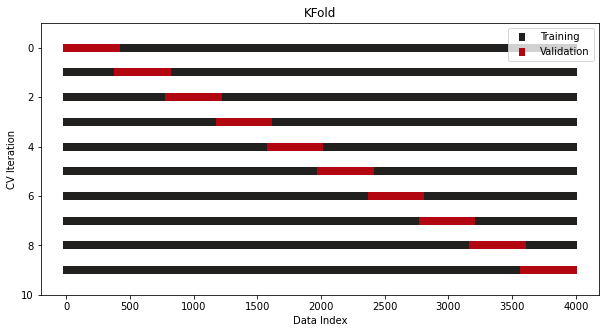

[0.76702509 0.81362007 0.81003584 0.77060932 0.73835125 0.77419355
 0.8172043  0.73476703 0.77697842 0.76258993]
The average score is 0.776537


In [13]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_cv(cv, Xtrain, Ytrain): 
    fig, ax = plt.subplots(figsize=(10, 5)) 
 
    for ii, (tr, tt) in enumerate(cv.split(X, y)): 
        p1 = ax.scatter(tr, [ii] * len(tr), c="#221f1f", marker="_", lw=8) 
        p2 = ax.scatter(tt, [ii] * len(tt), c="#b20710", marker="_", lw=8) 
        ax.set( 
            title=cv.__class__.__name__, 
            xlabel="Data Index", 
            ylabel="CV Iteration", 
            ylim=[cv.n_splits, -1], 
        ) 
        ax.legend([p1, p2], ["Training", "Validation"]) 
 
    plt.show()

from sklearn.model_selection import KFold  
cv = KFold(n_splits=10) 
visualize_cv(cv, X, y)
scores = cross_val_score(KNN, Xtrain, Ytrain, cv=10)
print(scores)
average = 0
for i in range(len(scores)):
    average = average + scores[i]
print("The average score is %f"%(average/len(scores)))

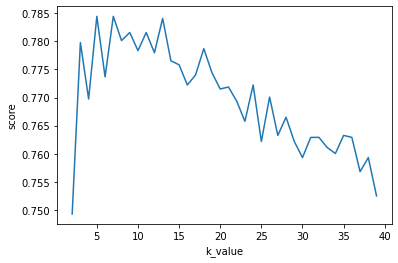

最大值下标： 3
最大值对应的k值： 5


In [14]:
# 学习曲线&交叉验证
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import numpy as np
if __name__ == '__main__':
    face_data=data_x.reshape(data_x.shape[0],-1)
    face_target = data_y
#print(face_data.shape)
    X = face_data
    y = face_target
    # 3、数据集进行拆分
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=500)
    scores = []
    ks = []
    for k in range(2,40):
        KNN = KNeighborsClassifier(n_neighbors=k)
        cross_score = cross_val_score(KNN,Xtrain,Ytrain,cv=10).mean()
        scores.append(cross_score)
        ks.append(k)
    ks_arr = np.array(ks)
    scores_arr = np.array(scores)
    plt.plot(ks_arr, scores_arr)
    plt.xlabel('k_value')
    plt.ylabel('score')
    plt.show()
    # 取最大值的下标
    max_idx = scores_arr.argmax()
    #最大值对应的k值
    max_k = ks[max_idx]
    # 最大值下标： 
    print('最大值下标：',max_idx)
    # 最大值对应的k值： 
    print('最大值对应的k值：',max_k)
